In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()
from cesium import datasets

# Returns
#     dict
#         Dictionary with attributes:
#             - times: list of (4096,) arrays of time values
#             - measurements: list of (4096,) arrays of measurement values
#             - classes: array of class labels for each time series
#             - archive: path to data archive
#             - header: path to header file

eeg = datasets.fetch_andrzejak()

Loaded data from cached archive.


{'times': [array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02

['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Norm

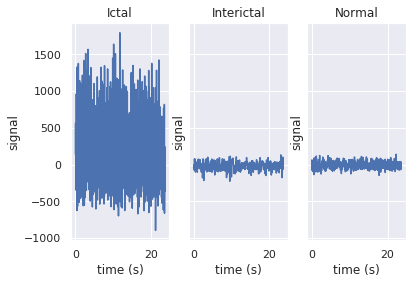

In [91]:
# Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16") #  allocate memory for longer class names

eeg["classes"][np.logical_or(eeg["classes"]=="Z", eeg["classes"]=="O")] = "Normal"
eeg["classes"][np.logical_or(eeg["classes"]=="N", eeg["classes"]=="F")] = "Interictal"
eeg["classes"][eeg["classes"]=="S"] = "Ictal"

print(eeg["classes"])

fig, ax = plt.subplots(1, len(np.unique(eeg["classes"])), sharey=True)
for label, subplot in zip(np.unique(eeg["classes"]), ax):
    i = np.where(eeg["classes"] == label)[0][0]
    subplot.plot(eeg["times"][i], eeg["measurements"][i])
    subplot.set(xlabel="time (s)", ylabel="signal", title=label)

In [3]:
df = pd.DataFrame(eeg)
df = df.drop(columns=['archive', 'header'])
df['id'] = df.index

In [4]:
df.head()

,times,measurements,classes,id
0,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[40.0, 48.0, 35.0, 5.0, -40.0, -54.0, -32.0, 6...",Z,0
1,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-56.0, -50.0, -64.0, -91.0, -135.0, -140.0, -...",Z,1
2,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-37.0, -22.0, -17.0, -24.0, -31.0, -20.0, -5....",Z,2
3,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-31.0, -43.0, -39.0, -39.0, -9.0, -5.0, 18.0,...",Z,3
4,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[14.0, 26.0, 32.0, 25.0, 16.0, 8.0, 8.0, 12.0,...",Z,4


In [5]:
df_y = df.drop(columns=['times', 'measurements'])

In [7]:
data_all = []
i = 0

for x in range(4097):
    for index, row in df.iterrows():
            data = [row['times'][x], row['measurements'][x], row['id']]
            data_all.append(data)

In [8]:
df_x = pd.DataFrame(data_all, columns = ['time', 'measurement', 'id']) 
df_x = df_x.sort_values(by=['id', 'time'])
df_x = df_x.reset_index(drop=True)

In [10]:
from tsfresh import extract_features
extracted_features = extract_features(df_x, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 72/72 [32:59<00:00, 12.13s/it]   


In [11]:
extracted_features

variable,measurement__abs_energy,measurement__absolute_sum_of_changes,"measurement__agg_autocorrelation__f_agg_""mean""__maxlag_40","measurement__agg_autocorrelation__f_agg_""median""__maxlag_40","measurement__agg_autocorrelation__f_agg_""var""__maxlag_40","measurement__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","measurement__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","measurement__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","measurement__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","measurement__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,measurement__symmetry_looking__r_0.9,measurement__symmetry_looking__r_0.9500000000000001,measurement__time_reversal_asymmetry_statistic__lag_1,measurement__time_reversal_asymmetry_statistic__lag_2,measurement__time_reversal_asymmetry_statistic__lag_3,measurement__value_count__value_-1,measurement__value_count__value_0,measurement__value_count__value_1,measurement__variance,measurement__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,6.760553e+06,46948.0,0.179654,0.141554,0.041965,34.316112,-0.057866,-0.017027,0.014543,67.319130,...,1.0,1.0,7.111648e+01,7.279155e+02,2.081540e+03,60.0,29.0,32.0,1633.048953,1.0
1,2.103041e+07,61118.0,0.125309,0.073677,0.036423,-12.513335,0.068248,0.023024,0.016663,24.896856,...,1.0,1.0,-1.861719e+02,-2.148111e+02,2.017015e+03,29.0,26.0,16.0,2382.676526,1.0
2,9.767461e+06,51269.0,0.192327,0.158494,0.051604,44.739505,0.096738,0.032892,0.016754,79.015574,...,1.0,1.0,-1.710183e+02,-1.293519e+03,-3.613846e+03,41.0,34.0,36.0,2222.631150,1.0
3,9.143449e+06,75014.0,0.099767,0.050410,0.029891,42.078797,0.017037,0.005459,0.015860,90.536585,...,1.0,1.0,-6.042613e+01,-2.460166e+02,-4.163102e+02,51.0,40.0,41.0,2215.802969,1.0
4,9.590945e+06,52873.0,0.241760,0.212578,0.041142,14.055724,0.086515,0.029556,0.016850,45.168675,...,1.0,1.0,1.493578e+02,9.462712e+02,2.823955e+03,46.0,28.0,33.0,2016.994142,1.0
5,1.147638e+07,52734.0,0.254876,0.188805,0.028373,13.127684,-0.051060,-0.015783,0.015283,46.967676,...,1.0,1.0,3.006359e+02,8.696851e+02,1.663510e+03,43.0,24.0,33.0,2027.044839,1.0
6,9.495812e+06,63591.0,0.130938,0.076325,0.033590,29.522592,0.011141,0.003635,0.016151,71.035263,...,1.0,1.0,-8.527863e+01,-5.208918e+02,-1.055628e+03,52.0,40.0,32.0,2139.935127,1.0
7,4.416482e+06,41753.0,0.183769,0.134000,0.036156,23.201104,0.024621,0.005338,0.010730,52.019101,...,1.0,1.0,7.730403e+01,4.987777e+02,1.281329e+03,66.0,62.0,56.0,1046.012990,1.0
8,4.335177e+06,32107.0,0.274486,0.213017,0.046454,29.953854,0.011131,0.002623,0.011665,55.414046,...,1.0,1.0,-1.155751e+01,-6.185878e+01,-1.125167e+02,58.0,52.0,39.0,990.880077,1.0


In [12]:
list(extracted_features)

['measurement__abs_energy',
 'measurement__absolute_sum_of_changes',
 'measurement__agg_autocorrelation__f_agg_"mean"__maxlag_40',
 'measurement__agg_autocorrelation__f_agg_"median"__maxlag_40',
 'measurement__agg_autocorrelation__f_agg_"var"__maxlag_40',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_le

In [13]:
# Convert df_y to a numpy array.
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df_y['classes'])
list(label_encoder.classes_)

['F', 'N', 'O', 'S', 'Z']

In [14]:
df_y['class_numerical'] = label_encoder.transform(df_y['classes'])
df_y = df_y.drop(columns=['classes', 'id'])

In [15]:
# Convert to numpy array.
y = df_y['class_numerical'].values

In [16]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [17]:
features_filtered

variable,"measurement__agg_autocorrelation__f_agg_""var""__maxlag_40",measurement__number_cwt_peaks__n_5,measurement__number_peaks__n_3,measurement__approximate_entropy__m_2__r_0.3,measurement__approximate_entropy__m_2__r_0.1,"measurement__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""stderr""",measurement__number_peaks__n_5,measurement__approximate_entropy__m_2__r_0.5,"measurement__fft_aggregated__aggtype_""skew""","measurement__augmented_dickey_fuller__attr_""pvalue""",...,"measurement__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_10__w_20","measurement__fft_coefficient__coeff_32__attr_""real""","measurement__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_11__w_20","measurement__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_12__w_20","measurement__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_20","measurement__fft_coefficient__coeff_61__attr_""imag""","measurement__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_1__w_20","measurement__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.6","measurement__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_20","measurement__fft_coefficient__coeff_25__attr_""real"""
id,,,,,,,,,,,,,,,,,,,,,
0,0.041965,362.0,328.0,0.722893,1.324700,2.617416,256.0,0.523761,2.290781,4.272825e-15,...,63.968778,-787.084766,61.005481,57.681840,54.023607,-5453.865614,72.279666,-0.262425,71.164539,7976.506749
1,0.036423,354.0,344.0,0.766499,1.438711,4.866127,268.0,0.553673,2.304928,7.359336e-15,...,-283.817085,-11225.885783,-306.228800,-327.210704,-346.645932,-4301.552797,-43.232894,0.093541,-15.457847,6129.606002
2,0.051604,357.0,318.0,0.704376,1.360644,3.700483,264.0,0.511752,2.304097,1.406181e-15,...,61.346629,-2606.924177,59.536997,56.860615,53.279078,-999.376324,48.308113,0.000000,44.875661,847.433038
3,0.029891,385.0,403.0,1.027837,1.765394,4.614846,302.0,0.700123,1.677558,2.421085e-15,...,-69.579968,-4766.701423,-69.117286,-68.171749,-66.775538,-4233.027424,-50.704103,0.010582,-46.338436,-5004.847995
4,0.041142,388.0,330.0,0.796822,1.520021,4.743773,262.0,0.541857,2.046037,1.095065e-11,...,101.911000,4842.686910,104.564728,106.973578,109.153916,-3382.797521,66.359789,0.181263,61.293243,-4276.718545
5,0.028373,382.0,347.0,0.746557,1.405011,3.417898,262.0,0.534856,2.268924,1.188615e-08,...,12.250129,-3385.163807,19.823529,27.854673,36.254755,-380.645358,-25.385702,-0.024896,-25.674351,-2547.227257
6,0.033590,394.0,385.0,0.829078,1.493171,4.323021,293.0,0.578076,2.175830,8.300086e-16,...,32.868031,-5111.237348,39.522077,46.154592,52.745894,3079.965810,-24.270718,-0.004975,-29.875788,-777.707255
7,0.036156,369.0,364.0,0.791850,1.433003,1.718980,285.0,0.553831,2.218595,1.338411e-11,...,-145.774393,4312.158178,-147.492120,-148.496007,-148.768145,2187.593943,-103.786345,0.234649,-97.041470,-6176.612991
8,0.046454,370.0,358.0,0.748298,1.445354,1.764502,250.0,0.487904,2.062822,3.128611e-14,...,65.501678,6330.772844,60.222399,54.247006,47.642468,5549.954855,76.795421,-0.084746,74.145153,5499.929205


In [18]:
list(features_filtered)

['measurement__agg_autocorrelation__f_agg_"var"__maxlag_40',
 'measurement__number_cwt_peaks__n_5',
 'measurement__number_peaks__n_3',
 'measurement__approximate_entropy__m_2__r_0.3',
 'measurement__approximate_entropy__m_2__r_0.1',
 'measurement__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"stderr"',
 'measurement__number_peaks__n_5',
 'measurement__approximate_entropy__m_2__r_0.5',
 'measurement__fft_aggregated__aggtype_"skew"',
 'measurement__augmented_dickey_fuller__attr_"pvalue"',
 'measurement__augmented_dickey_fuller__attr_"teststat"',
 'measurement__spkt_welch_density__coeff_5',
 'measurement__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"',
 'measurement__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"stderr"',
 'measurement__agg_linear_trend__f_agg_"min"__chunk_len_5__attr_"stderr"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"stderr"',
 'measurement__agg_linear_trend__f_agg_"min"__chunk_len_10__attr_"stderr"',
 'measurement__agg_

In [201]:
# figure out where to split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Conv1D, MaxPooling1D, Flatten
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

X = features_filtered
y = eeg["classes"]

skf = StratifiedKFold(n_splits=5)

# integer encode
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

preds_lr_accuracy = []
preds_lr_precision = []
preds_lr_recall = []
preds_lr_f1 = []

preds_nb_accuracy = []
preds_nb_precision = []
preds_nb_recall = []
preds_nb_f1 = []

preds_knn_accuracy = []
preds_knn_precision = []
preds_knn_recall = []
preds_knn_f1 = []

preds_rfc_accuracy = []
preds_rfc_precision = []
preds_rfc_recall = []
preds_rfc_f1 = []

X = X.values

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model_lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
    model_nb = GaussianNB().fit(X_train, y_train) 
    model_knn = KNeighborsClassifier(3).fit(X_train, y_train)
    model_rfc = RandomForestClassifier(n_estimators=128, max_features="auto", random_state=0).fit(X_train, y_train)
    
    preds_lr = model_lr.predict(X_test)
    preds_nb = model_nb.predict(X_test)
    preds_knn = model_knn.predict(X_test)
    preds_rfc = model_rfc.predict(X_test)
    
    preds_lr_accuracy.append(accuracy_score(y_test, preds_lr))
    preds_lr_precision.append(precision_score(y_test, preds_lr, average='weighted'))
    preds_lr_recall.append(recall_score(y_test, preds_lr, average='weighted'))
    preds_lr_f1.append(f1_score(y_test, preds_lr, average='weighted'))
    
    preds_nb_accuracy.append(accuracy_score(y_test, preds_nb))
    preds_nb_precision.append(precision_score(y_test, preds_nb, average='weighted'))
    preds_nb_recall.append(recall_score(y_test, preds_nb, average='weighted'))
    preds_nb_f1.append(f1_score(y_test, preds_nb, average='weighted'))
    
    preds_knn_accuracy.append(accuracy_score(y_test, preds_knn))
    preds_knn_precision.append(precision_score(y_test, preds_knn, average='weighted'))
    preds_knn_recall.append(recall_score(y_test, preds_knn, average='weighted'))
    preds_knn_f1.append(f1_score(y_test, preds_knn, average='weighted'))
    
    preds_rfc_accuracy.append(accuracy_score(y_test, preds_rfc))
    preds_rfc_precision.append(precision_score(y_test, preds_rfc, average='weighted'))
    preds_rfc_recall.append(recall_score(y_test, preds_rfc, average='weighted'))
    preds_rfc_f1.append(f1_score(y_test, preds_rfc, average='weighted'))

In [202]:
def get_ave(array):
        return sum(array) / len(array) 

In [205]:
print("Logistic Regression:")
print("Average Accuracy: %.4f" % get_ave(preds_lr_accuracy))
print("Average Precision: %.4f" % get_ave(preds_lr_precision))
print("Average Sensitivity: %.4f" % get_ave(preds_lr_recall))
print("Average F1 Score: %.4f" % get_ave(preds_lr_f1))

print("\nNaive Bayes:")
print("Average Accuracy: %.4f" % get_ave(preds_nb_accuracy))
print("Average Precision: %.4f" % get_ave(preds_nb_precision))
print("Average Sensitivity: %.4f" % get_ave(preds_nb_recall))
print("Average F1 Score: %.4f" % get_ave(preds_nb_f1))


print("\nK-Nearest Neighbors:")
print("Average Accuracy: %.4f" % get_ave(preds_knn_accuracy))
print("Average Precision: %.4f" % get_ave(preds_knn_precision))
print("Average Sensitivity: %.4f" % get_ave(preds_knn_recall))
print("Average F1 Score: %.4f" % get_ave(preds_knn_f1))

print("\nRandom Forest Classifier:")
print("Average Accuracy: %.4f" % get_ave(preds_rfc_accuracy))
print("Average Precision: %.4f" % get_ave(preds_rfc_precision))
print("Average Sensitivity: %.4f" % get_ave(preds_rfc_recall))
print("Average F1 Score: %.4f" % get_ave(preds_rfc_f1))

Logistic Regression:
Average Accuracy: 0.8880
Average Precision: 0.9047
Average Sensitivity: 0.8880
Average F1 Score: 0.8859

Naive Bayes:
Average Accuracy: 0.6780
Average Precision: 0.7187
Average Sensitivity: 0.6780
Average F1 Score: 0.6461

K-Nearest Neighbors:
Average Accuracy: 0.6500
Average Precision: 0.6490
Average Sensitivity: 0.6500
Average F1 Score: 0.6482

Random Forest Classifier:
Average Accuracy: 0.9460
Average Precision: 0.9495
Average Sensitivity: 0.9460
Average F1 Score: 0.9460
